In [4]:

# External library to plot results from full-wave solver
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/arnau/documents/ETHZ/Semester_Project_Master_Thesis/plotMithraPy')
import plotMiFuncs as pmf

# To make plot backgrounds white
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

# Other libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
from decimal import Decimal

generic_fn = '/und'
fs = 14

pltpath = 'plots'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Plotting tests/case0


2999992 particles has been reduced to 29916
Plotting tests/dr_case0


500000 particles has been reduced to 5001
spos =  [1.13]


Plotting tests/drRed_case0


500000 particles has been reduced to 5087
spos =  [1.13]


Plotting tests/case1


2999992 particles has been reduced to 30002
Plotting tests/dr_case1


500000 particles has been reduced to 4865


spos =  [1.13]
Plotting tests/drRed_case1


500000 particles has been reduced to 4921
spos =  [1.13]


Plotting tests/case2


2999991 particles has been reduced to 29998
Plotting tests/dr_case2


500000 particles has been reduced to 4974


spos =  [1.13]
Plotting tests/drRed_case2


500000 particles has been reduced to 5053


spos =  [1.13]
Plotting tests/case3


2999974 particles has been reduced to 29854
Plotting tests/dr_case3


500000 particles has been reduced to 4998
spos =  [1.13]


Plotting tests/drRed_case3


500000 particles has been reduced to 4990
spos =  [1.13]


Plotting tests/case5


2999978 particles has been reduced to 30045
Plotting tests/dr_case5


500000 particles has been reduced to 4902


spos =  [1.13]
Plotting tests/drRed_case5


500000 particles has been reduced to 4976


spos =  [1.13]


Plotting tests/case11


2999979 particles has been reduced to 29794
Plotting tests/dr_case11


500000 particles has been reduced to 4999
spos =  [1.13]


Plotting tests/drRed_case11


500000 particles has been reduced to 4905
spos =  [1.13]


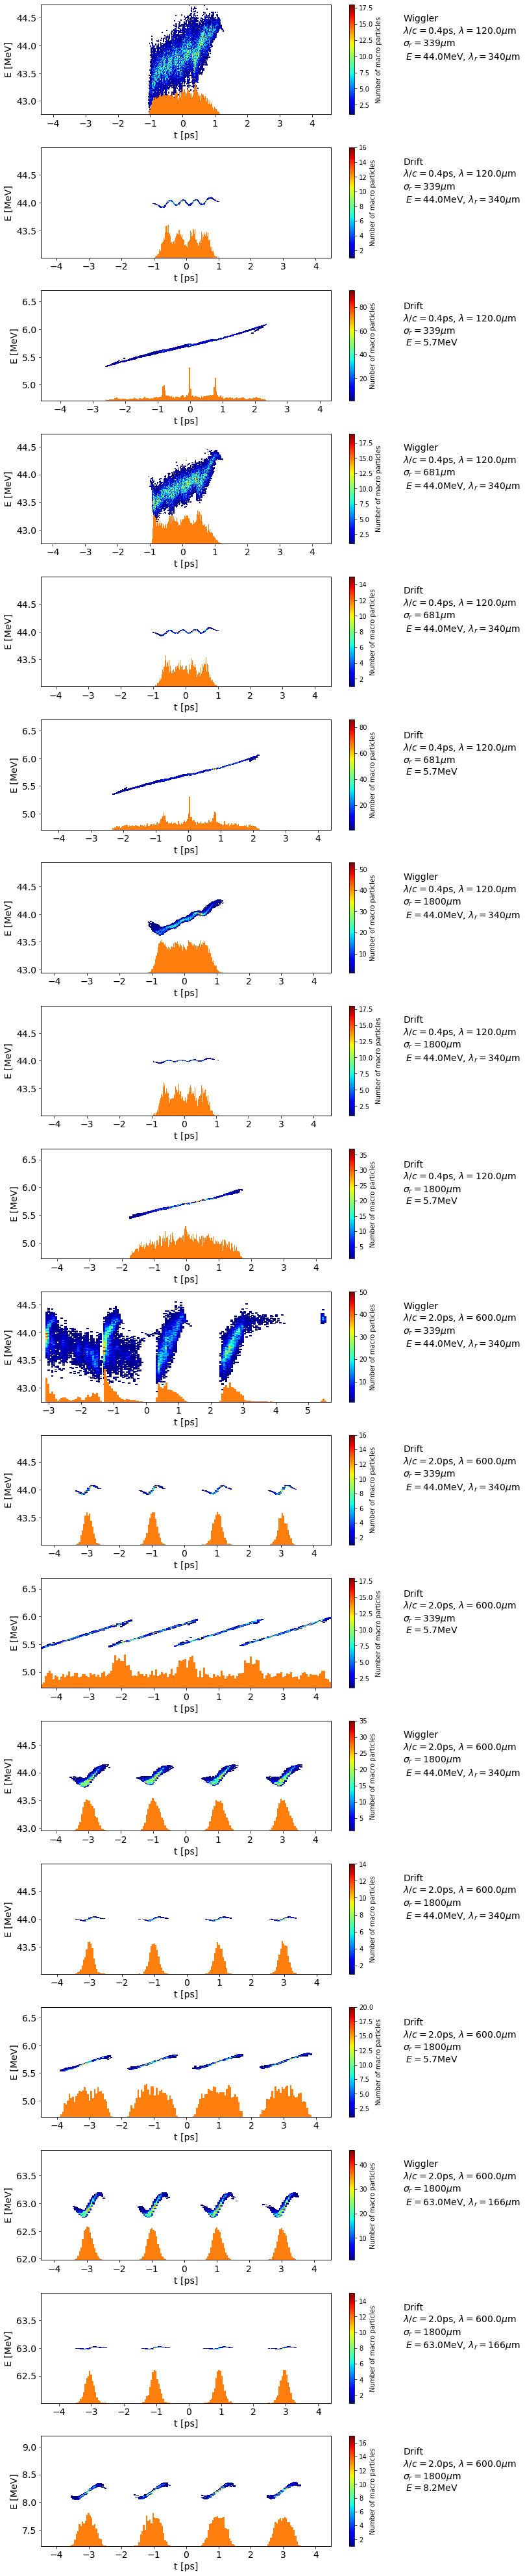

In [5]:
fileFW  ='/bunch-screen/bunch-p#-screen#.txt'
qx = 't'
qy = 'E'

fig, ax = plt.subplots(figsize = (10, 4))
fig.subplots_adjust(hspace = .3)
i = 0
for _,row in params.iterrows():
    fn = 'tests/' + row['case']
    print('Plotting', fn)
    if 'dr' in row['case']:
        [x,y,spos] = get_screen_xy(fn, fileStatic, qx, qy, show = False, reduce_factor = 100)
        y *= 1e6  # MeV to eV
    else:
        [x,y] = pmf.importScreenXY( fn + fileFW, show = False, xquant = qx, yquant = qy, index_screen = -1, reduce_factor = 100)
    pmf.plotScreenXY(ax[i], x, y, [qx, qy], type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 150, color = 1, maxHH = .3)
    ax[i].text( 1.25, .5, strParam(row), fontsize = fs, transform = ax[i].transAxes  )
    i += 1
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

plt.savefig((pltpath + '/wigglerAll.png'),bbox_inches='tight')


tests/case0/bunch-sampling/bunch.txt
tests/case1/bunch-sampling/bunch.txt
tests/case5/bunch-sampling/bunch.txt


Mesh limits z -0.0487398949188498 0.0487398949188498
Mesh limits x -0.01 0.01
Mesh limits y -0.01 0.01


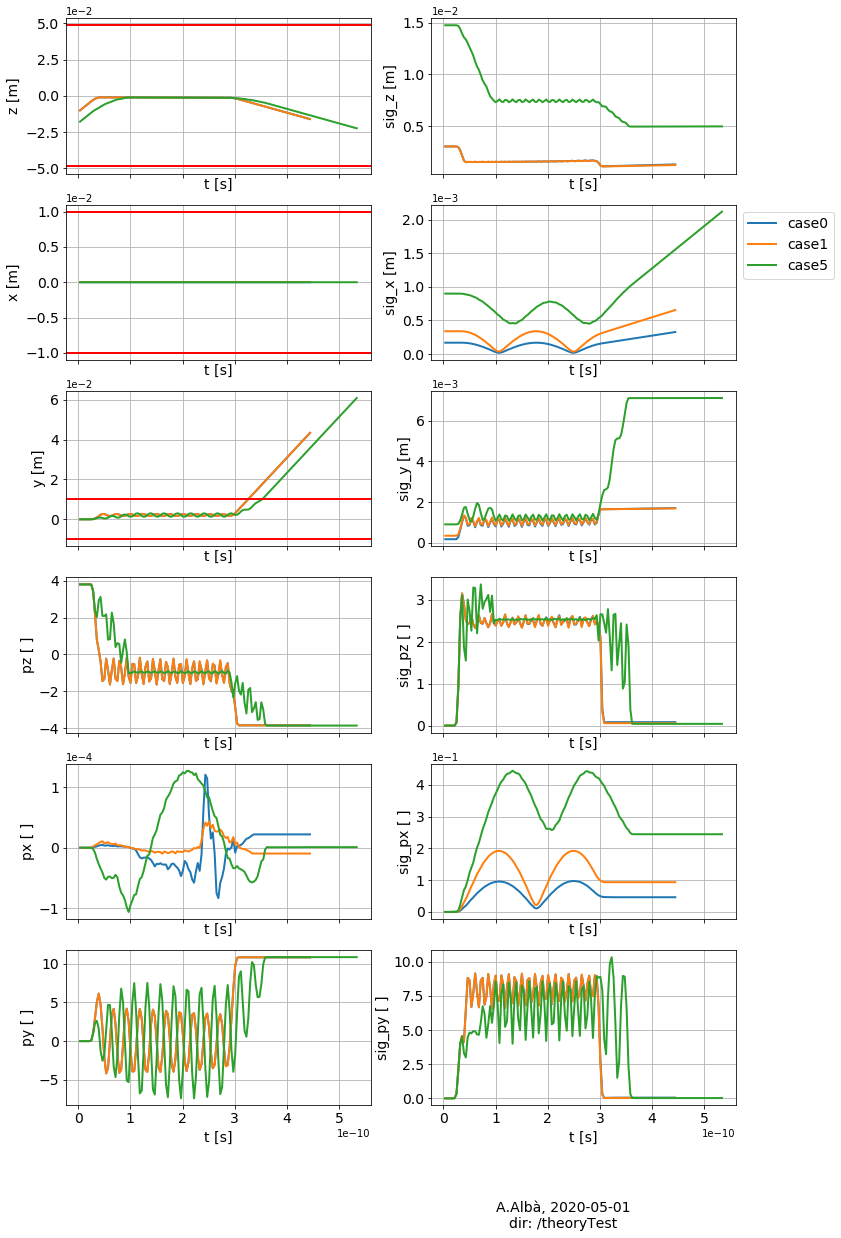

In [131]:
# Stats undulator
stats = []
leg = []
for _,row in params.iterrows():
    p = 'tests/' + row['case']
    if 'dr' in p:
        continue
    leg.append(row['case'])
    stats.append( pmf.importStat( p + '/bunch-sampling/bunch.txt', show = True) )

names = [ 'z', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
Ls = [20e-3, 20e-3, 8e-3]  # Mesh lengths
K = 10.81
E = 48  # MeV
Ls[2] *= E / .511 / np.sqrt(1 + .5 * K**2)  # * gamma_
dotted = [4,5]  # Indexes from fnames to plot with dotted lines
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    ax.grid()
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = ['t',names[i]], factors = [1, 1], fs = fs, lw = lw, ls = ls )
        # legLocal.append(leg[j])
        # if int(i/10) == 0:
        #     ax.set_xlabel('')
        axs[1,1].legend(leg, fontsize = fs, bbox_to_anchor = [1., 1.])
# Draw mesh limits
xyz = ['x', 'y', 'z']
for j in range(3):
    i  = (2 + j) % 3
    print('Mesh limits', xyz[i], -.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    # axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])  # Mesh limits as plot limits
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
# plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()

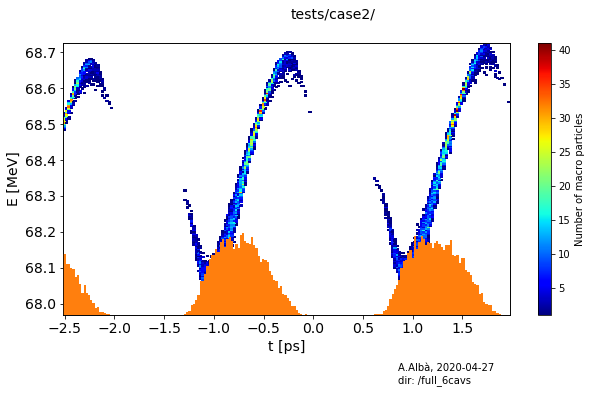

In [11]:
fn = prefixes[-1]
xquant = 't'
yquant = 'E'
rf = 100
fig, ax = plt.subplots(1,1,figsize = (10, 5))
[x,y] = pmf.importScreenXY( fn + 'bunch-screen/bunch-p#-screen#.txt', show = False, xquant = xquant, yquant = yquant, index_screen = -1, reduce_factor = rf)
pmf.plotScreenXY(ax, x, y, [xquant, yquant], type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 200, color = 1)
# ax.text( 1.3, .4, 'After wiggler', transform=axs[1].transAxes, fontsize = fs, ha='center' )
fig.suptitle(fn, fontsize = fs)
ax.text( .75, -.25, footnote, transform=ax.transAxes )
# pmf.adjust_axes_limits( axs, 'x' )
# pmf.adjust_axes_limits( axs, 'y' )
# plt.savefig( ('plots' + '/befAft.png'), bbox_inches='tight' )    
plt.show()

spos =  [25.27]


Using 300439 particles for the plots


spos =  [25.27]


Using 300067 particles for the plots


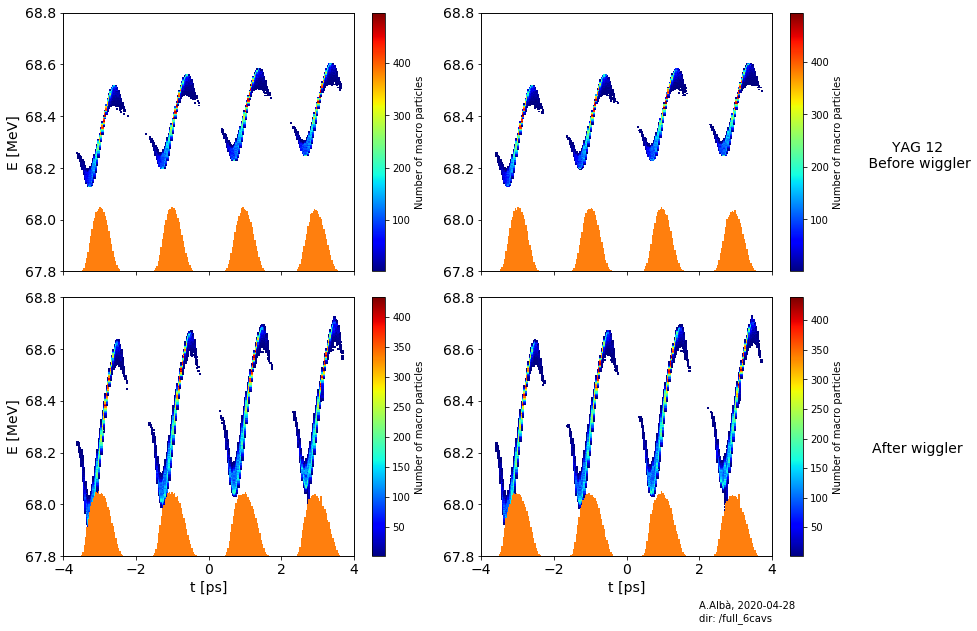

In [19]:
# Plot yag and last screen for all examples
fnYAG = 'DYAG12.h5'
xquant = 't'
yquant = 'E'
ybot = 67.8
ytop = 68.8
nbins = 200
rf = 10
maxHH = .25
fig, ax = plt.subplots(2,len(prefixes), figsize = (7 * len(prefixes),10), sharex = True, sharey = False)
fig.subplots_adjust(hspace = .1, wspace = .15)
for i,fn in enumerate(prefixes):
    # Before und
    [x,y,spos] = get_screen_xy(fn, fnYAG, 'time', 'E', show = False, reduce_factor = rf)
    pmf.plotScreenXY(ax[0,i], x, y, [xquant, yquant], type = 'hist2d-hist', factors = [-1e12,1], nbins = nbins, color = 1, maxHH = maxHH)
    ax[0,i].set_xlabel('')
    ax[0,i].set_ylabel('')
    # ax[0,i].text(.3, 1.2, leg[i], transform=ax[0,i].transAxes, fontsize = fs, ha='center' )
    ax[0,i].set_xlim(left = -4.0, right = 4.0)
    ax[0,i].set_ylim(bottom = ybot, top = ytop)
    # After und
    [x,y] = pmf.importScreenXY( fn + 'bunch-screen/bunch-p#-screen#.txt', show = False, xquant = xquant, yquant = yquant, index_screen = -1, reduce_factor = rf)
    pmf.plotScreenXY(ax[1,i], x, y, [xquant, yquant], type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = nbins, color = 1, maxHH = maxHH)
    ax[1,i].set_ylabel('')
    ax[1,i].set_ylim(bottom = ybot, top = ytop)
    ax[1,i].set_xlim(left = -4.0, right = 4.0)
    print('Using', len(x), 'particles for the plots')
ax[0,0].set_ylabel('E [MeV]', fontsize = fs)
ax[1,0].set_ylabel('E [MeV]', fontsize = fs)
ax[0,-1].text( 1.5, .4, 'YAG 12\n Before wiggler', transform=ax[0,-1].transAxes, fontsize = fs, ha='center' )
ax[1,-1].text( 1.5, .4, 'After wiggler', transform=ax[1,-1].transAxes, fontsize = fs, ha='center' )
ax[-1,-1].text( .75, -.25, footnote, transform=ax[-1,-1].transAxes )
pmf.adjust_axes_limits(ax.reshape(-1), 'y')
# pmf.adjust_axes_limits(ax[1,:], 'y')
plt.savefig( ('plots' + '/allBefAft3.png'), bbox_inches='tight' )    
plt.show()

In [ ]:
# fn = prefixes[-1]
# [data, screens] = pmf.importScreen( fn + 'bunch-screen/bunch-p#-screen#.txt', show = True )

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  1 , number of processors =  88
0 tests/case5/bunch-screen/bunch-p#-screen0.txt


Screens at  [0.95]


Npart =  100000


Npart =  100000


Npart =  100000


Npart =  100000


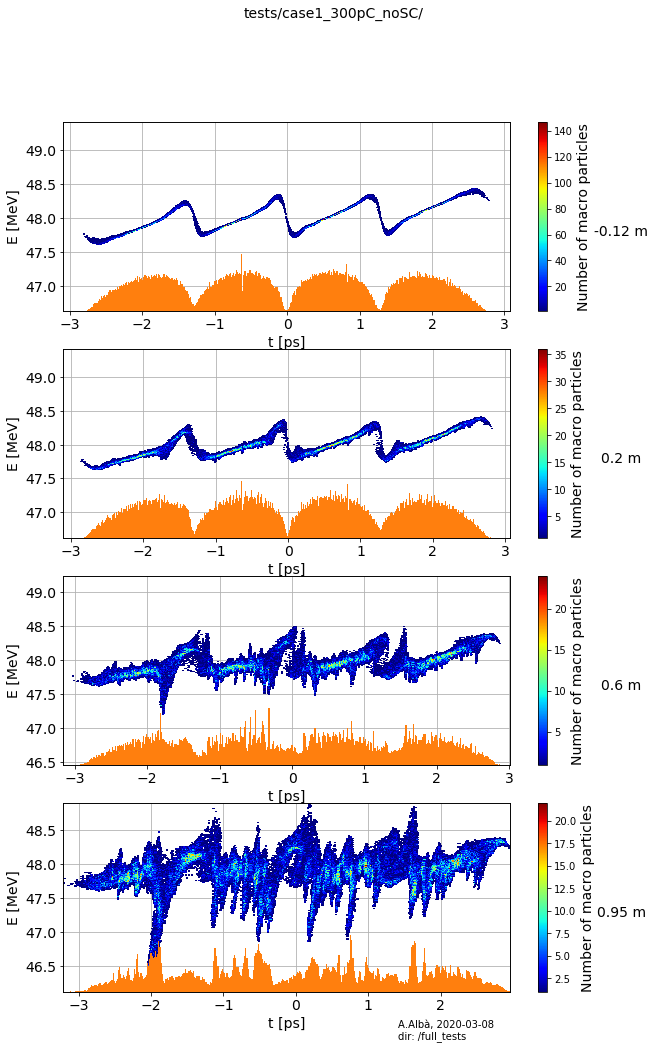

In [13]:
# Plot all screens for one folder
fig, ax = plt.subplots( len(screens), 1, figsize = ( 10, 4*len(screens) ), sharey = False, sharex = False )
if len(screens) > 1:
    ax = ax.reshape(-1)
    for i in range(len(screens)):
        [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = i, type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 400, color = 1)
        ax[i].text( 1.25, .4, str(screens[i]) + ' m', transform=ax[i].transAxes, fontsize = fs, ha='center' )
        ax[i].grid()
        print('Npart = ', len(x))
        # ax[i].set_xlim(left = 0.5, right = 0.8)
        # ax[i].set_ylim(bottom = -1e-1, top = 1e-1)

    pmf.adjust_axes_limits( ax, 'x' )
    pmf.adjust_axes_limits( ax, 'y' )
else:
    [x,y] = pmf.plotScreen( ax, data, ['x', 'px'], screenNum = 0, type = 'hist2d', factors = [-1e12,1e-6], nbins = 100, color = 1)
 
fig.suptitle(fn, fontsize = fs)
ax[-1].text( .75, -.25, footnote, transform=ax[-1].transAxes )
# plt.savefig( ('plots' + '/energy_case1_300pC_noSC.png'), bbox_inches='tight' )    
plt.show()
